In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:


url = "https://everyearthquake.p.rapidapi.com/earthquakes"

querystring = {"start":"1","count":"100","type":"earthquake","latitude":"33.962523","longitude":"-118.3706975","radius":"1000","units":"miles","magnitude":"3","intensity":"1"}

headers = {
	"X-RapidAPI-Key": "17acbf54dcmsh44d26114be6f21ep14e902jsnb0693f55136c",
	"X-RapidAPI-Host": "everyearthquake.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'httpStatus': 200, 'noun': 'earthquakes', 'verb': 'GET', 'errorCode': 'none', 'errors': [], 'friendlyError': '', 'result': 'success', 'count': 100, 'data': [{'id': 'uu60548782', 'magnitude': '3.66', 'type': 'earthquake', 'title': 'M 3.7 - 15 km ENE of Wolf Creek, Utah', 'date': '2023-08-31T00:11:18', 'time': '1693440678900', 'updated': '1693487314918', 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/uu60548782', 'detailUrl': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/uu60548782.geojson', 'felt': '559', 'cdi': '4', 'mmi': '3', 'alert': '', 'status': 'reviewed', 'tsunami': '0', 'sig': '419', 'net': 'uu', 'code': '60548782', 'ids': ',uu60548782,us7000ks8l,', 'sources': ',uu,us,', 'types': ',dyfi,moment-tensor,origin,phase-data,shakemap,', 'nst': '38', 'dmin': '0', 'rms': '0.19', 'gap': '78', 'magType': 'ml', 'geometryType': 'Point', 'depth': '11.84', 'latitude': '41.3857', 'longitude': '-111.664', 'place': '15 km ENE of Wolf Creek, Utah', 'distanceKM': '15', 'pla

In [7]:
# Assuming 'response_data' contains the API response as a dictionary
response_data = response.json()

# Extracting metadata into a separate dictionary
metadata = {
    'httpStatus': response_data['httpStatus'],
    'noun': response_data['noun'],
    'verb': response_data['verb'],
    'errorCode': response_data['errorCode'],
    'errors': response_data['errors'],
    'friendlyError': response_data['friendlyError'],
    'result': response_data['result'],
    'count': response_data['count'],
}

# Displaying the metadata
for key, value in metadata.items():
    print(f"{key}: {value} (Type: {type(value)})")

# Posibility of saving this metadata to a file, database, etc.


httpStatus: 200 (Type: <class 'int'>)
noun: earthquakes (Type: <class 'str'>)
verb: GET (Type: <class 'str'>)
errorCode: none (Type: <class 'str'>)
errors: [] (Type: <class 'list'>)
friendlyError:  (Type: <class 'str'>)
result: success (Type: <class 'str'>)
count: 100 (Type: <class 'int'>)


           id  magnitude        type  \
0  uu60548782       3.66  earthquake   
1  ci39653906       3.60  earthquake   
2  tx2023qsaz       3.80  earthquake   
3  us7000kr6f       3.70  earthquake   
4  us7000kr5e       4.00  earthquake   

                                               title                 date  \
0              M 3.7 - 15 km ENE of Wolf Creek, Utah  2023-08-31T00:11:18   
1  M 3.6 - 45 km ENE of San Clemente Is. (SE tip)...  2023-08-29T08:05:33   
2         M 3.8 - 63 km S of Whites City, New Mexico  2023-08-26T13:30:11   
3       M 3.7 - 66 km SSW of Whites City, New Mexico  2023-08-26T13:30:11   
4              M 4.0 - 17 km SSW of Weston, Colorado  2023-08-26T08:38:44   

            time        updated  \
0  1693440678900  1693487314918   
1  1693296333310  1693382569838   
2  1693056611770  1693127496171   
3  1693056611758  1693057367526   
4  1693039124726  1693064910286   

                                                 url  \
0  https://earthquake.usgs.go

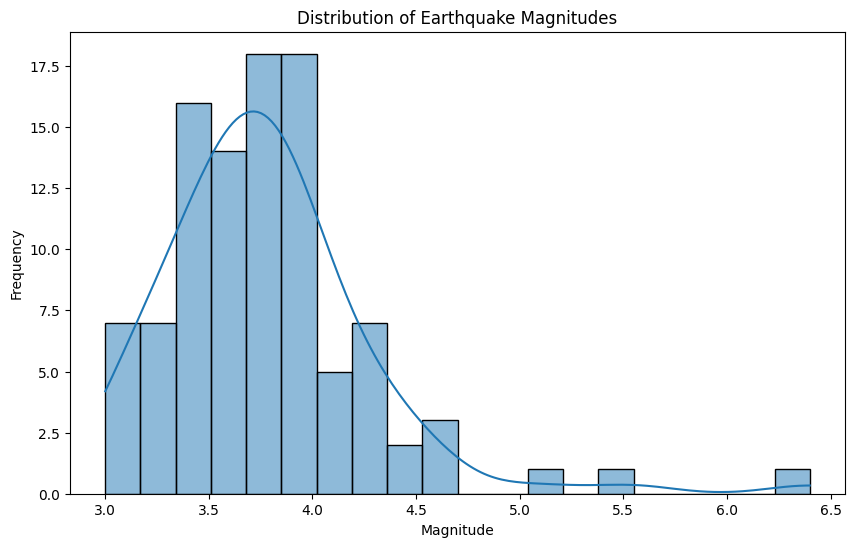

In [8]:
# Convert the 'data' field to a DataFrame
earthquake_df = pd.DataFrame(response_data['data'])

# Convert 'magnitude' to float for numerical operations
earthquake_df['magnitude'] = earthquake_df['magnitude'].astype(float)

# Display the first few rows of the DataFrame
print(earthquake_df.head())

# Plotting the data
plt.figure(figsize=(10, 6))

# Create a histogram for earthquake magnitudes
sns.histplot(earthquake_df['magnitude'], bins=20, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')

plt.show()

In [5]:
print(earthquake_df.columns)

Index(['id', 'magnitude', 'type', 'title', 'date', 'time', 'updated', 'url',
       'detailUrl', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig',
       'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap',
       'magType', 'geometryType', 'depth', 'latitude', 'longitude', 'place',
       'distanceKM', 'placeOnly', 'location', 'continent', 'country',
       'subnational', 'city', 'locality', 'postcode', 'what3words', 'timezone',
       'locationDetails'],
      dtype='object')


In [9]:
print(earthquake_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               100 non-null    object 
 1   magnitude        100 non-null    float64
 2   type             100 non-null    object 
 3   title            100 non-null    object 
 4   date             100 non-null    object 
 5   time             100 non-null    object 
 6   updated          100 non-null    object 
 7   url              100 non-null    object 
 8   detailUrl        100 non-null    object 
 9   felt             100 non-null    object 
 10  cdi              100 non-null    object 
 11  mmi              100 non-null    object 
 12  alert            100 non-null    object 
 13  status           100 non-null    object 
 14  tsunami          100 non-null    object 
 15  sig              100 non-null    object 
 16  net              100 non-null    object 
 17  code             

In [10]:
# Export DataFrame to CSV
#earthquake_df.to_csv('earthquake_data.csv', index=False)